In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [3]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=96,kernel_size=11,strides=4,input_shape=(32,32,3),padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=256,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))   #修正的输出

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 384)         8

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Epoch 1/10
134/134 [==============================] - 5s 40ms/step - loss: 1.8293 - accuracy: 0.3065 - val_loss: 2.6705 - val_accuracy: 0.1313
Epoch 2/10
134/134 [==============================] - 5s 36ms/step - loss: 1.4726 - accuracy: 0.4565 - val_loss: 2.7347 - val_accuracy: 0.2082
Epoch 3/10
134/134 [==============================] - 5s 36ms/step - loss: 1.3302 - accuracy: 0.5158 - val_loss: 1.9542 - val_accuracy: 0.3192
Epoch 4/10
134/134 [==============================] - 5s 36ms/step - loss: 1.2124 - accuracy: 0.5673 - val_loss: 1.3723 - val_accuracy: 0.5050
Epoch 5/10
134/134 [==============================] - 5s 36ms/step - loss: 1.1139 - accuracy: 0.6062 - val_loss: 1.5576 - val_accuracy: 0.4730
Epoch 6/10
134/134 [==============================] - 5s 36ms/step - loss: 1.0238 - accuracy: 0.6384 - val_loss: 1.2660 - val_accuracy: 0.5648
Epoch 7/10
134/134 [==============================] - 5s 36ms/step - loss: 0.9394 - accuracy: 0.6724 - val_loss: 1.3304 - val_accuracy: 0.5707

In [6]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

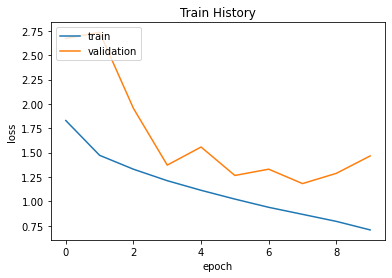

In [7]:
train_history(model_train,'loss','val_loss')

In [8]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 1s - loss: 1.4989 - accuracy: 0.5621
